In [1]:
import pandas as pd
dt = pd.read_csv("train_clean.csv")

In [2]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.282000,10.766568,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,100000.0,4198.771619,3187.494355,303.645417,1626.761667,3096.378333,5961.745000,15204.633333
Num_Bank_Accounts,100000.0,5.369840,2.592513,0.000000,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,100000.0,5.534720,2.066736,1.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,13.309920,6.199614,-2.000000,9.000000,14.000000,18.000000,28.000000
Changed_Credit_Limit,100000.0,10.389303,6.789784,-6.490000,5.320000,9.400000,14.860000,36.970000


In [2]:
# import libriries.

import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Credit_Score'>

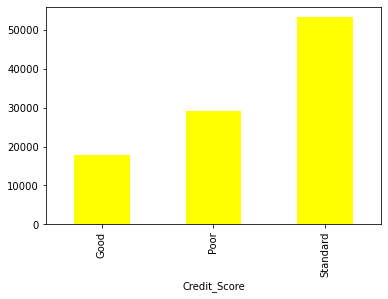

In [2]:
# Target Variable Frequency 

dt.groupby('Credit_Score').count()['ID'].plot(kind = 'bar',colormap='autumn_r')

The dataset is imbalanced.

C:\Users\B590\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


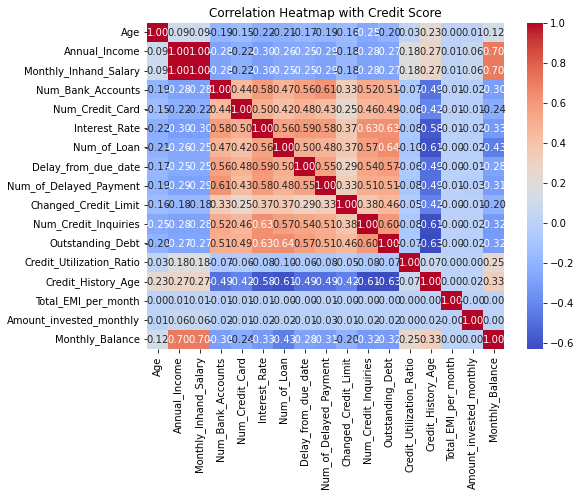

In [5]:
# Correlation Heatmap

numeric_dt = dt.select_dtypes(include="number")
 
plt.figure(figsize=(8, 6))
correlation_matrix = numeric_dt.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap with Credit Score")
plt.show()


Many variables are highly correlated. We need to plot further.

<AxesSubplot:xlabel='Payment_Behaviour'>

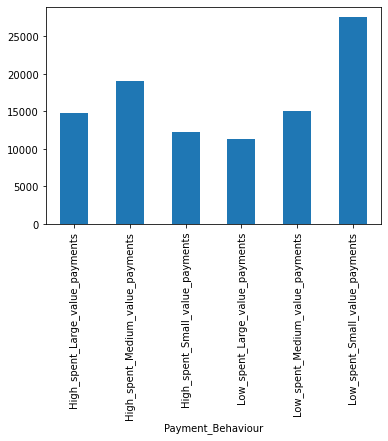

In [10]:
# Payment Behaviour plot

dt.groupby('Payment_Behaviour').count()['ID'].plot(kind = 'bar')

Most clients spend low, and have low value transactions.

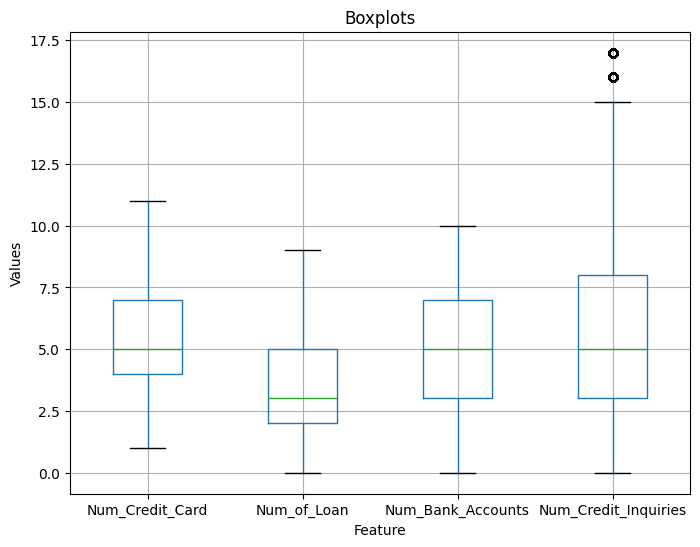

In [4]:
# Boxplots

boxplot_df = dt[['Num_Credit_Card','Num_of_Loan','Num_Bank_Accounts','Num_Credit_Inquiries']]

plt.figure(figsize=(8, 6))  # Set the figure size
boxplot_df.boxplot()  # Use pandas' built-in boxplot method

plt.title('Boxplots')
plt.xlabel('Feature')
plt.ylabel('Values')

plt.show()

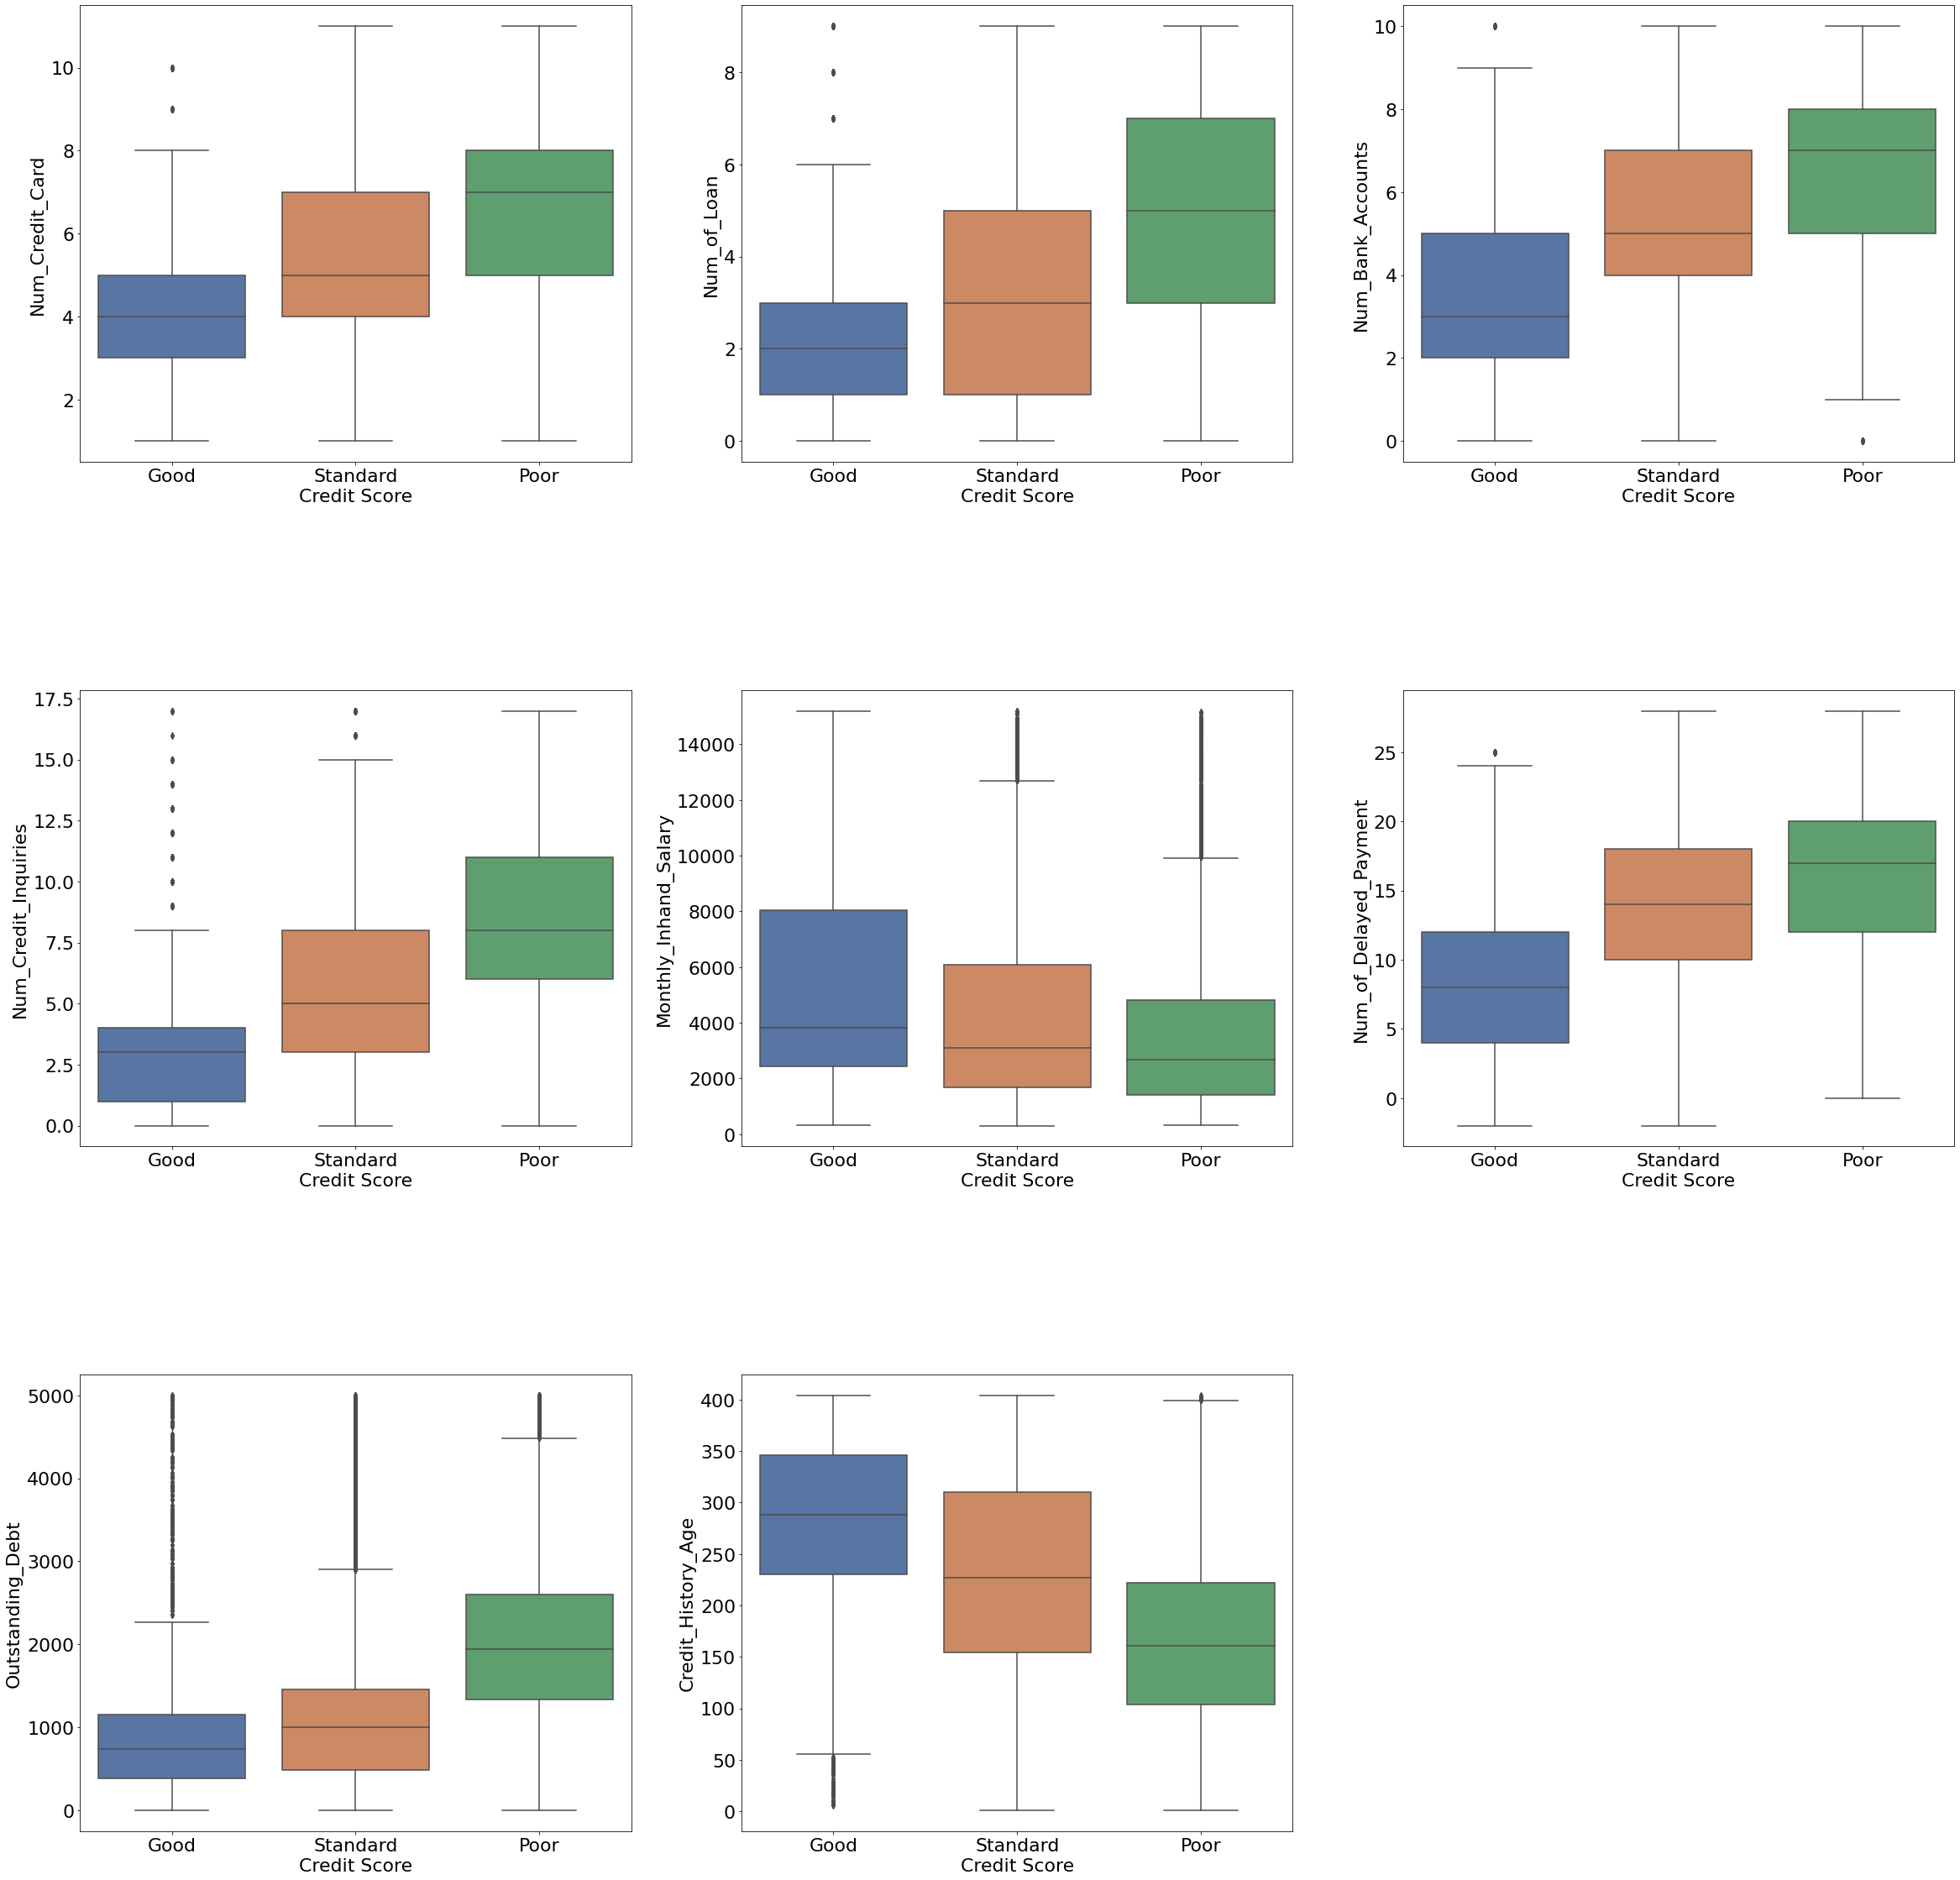

In [21]:
# Boxplot by Credit Score

boxplot_df = dt[['Num_Credit_Card','Num_of_Loan','Num_Bank_Accounts','Num_Credit_Inquiries','Monthly_Inhand_Salary'
                 ,'Num_of_Delayed_Payment','Outstanding_Debt','Credit_History_Age']]
num_cols = 3
num_rows = 3

plt.figure(figsize=(40,40))

for i, col in enumerate(boxplot_df):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='Credit_Score', y=col, data=dt, palette='deep')
    plt.xlabel('Credit Score', fontsize=22)
    plt.ylabel(col, fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

The boxplots above are quite informative. 
The Credit Score drops:
- as credit history age and monthly inhand salary are getting lower
- as outstanding dept, number of delayed payments, number of credit inquiries, number of bank accounts, number of loans and number of credit cards are increasing

In [28]:
# Scatterplots

def scatterplot3D_by_Credit_Score(x_col,y_col):
    
    sns.scatterplot(data=dt, x=x_col, y=y_col, hue='Credit_Score', palette='bright', s=100)

    plt.title(f'Relationship between {x_col} and {y_col} by Credit_Score', fontsize=15)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    
    plt.show()

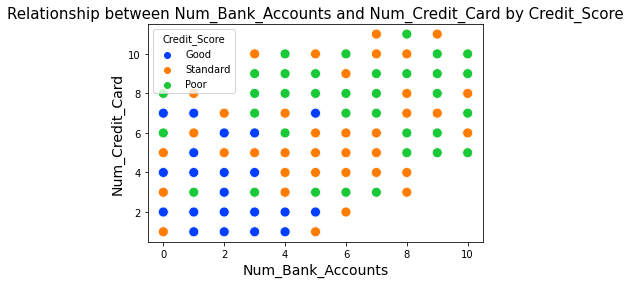

In [29]:
# Relationship between Number of bank accounts and Number of Credit cards by credit score.

scatterplot3D_by_Credit_Score('Num_Bank_Accounts','Num_Credit_Card')

People with less less bank accounts and less number of credit cards have better credit score

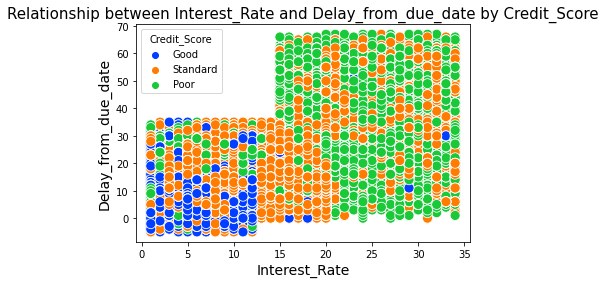

In [32]:
# Relationship between interest rate and delay from due date by credit score.

scatterplot3D_by_Credit_Score('Interest_Rate','Delay_from_due_date')

Customers with lower interest rates and lower delays tend to have good credit score.

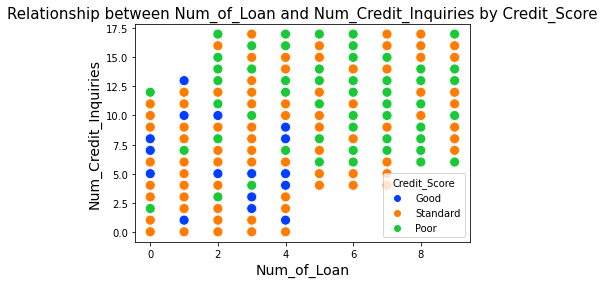

In [34]:
# Relationship between Number of loans and Number of Credit inquiries by credit score.

scatterplot3D_by_Credit_Score('Num_of_Loan','Num_Credit_Inquiries')

As the number of loans and the number of credit inquiries increases, the credit score drops.

In [35]:
# Histograms

def Histogram(x_col,hue):
    
    sns.histplot(data=dt, x=x_col, hue=hue, kde=True)
    plt.title(f'Histogram of {x_col}')


    plt.show()

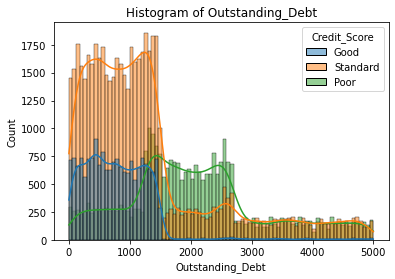

In [37]:
# Relationship between Outstanding Debt and Credit Score.

Histogram('Outstanding_Debt','Credit_Score')

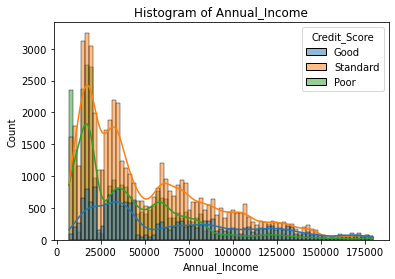

In [38]:
# Relationship between Annual income and Credit Score.

Histogram('Annual_Income','Credit_Score')

When Annual income is high is less probable to have poor or standard credit score

Text(0, 0.5, 'Mean Annual Income')

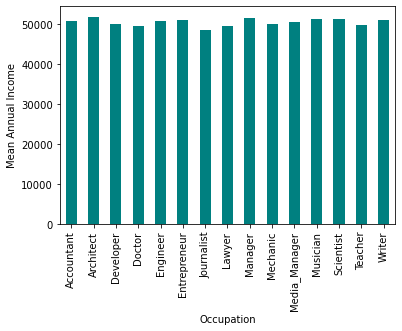

In [70]:
# Mean Annual Income for each Occupation

occ = dt.groupby('Occupation')['Annual_Income'].mean()
occ.plot(kind='bar',color='teal')
plt.ylabel('Mean Annual Income')

Text(0.5, 1.0, 'Distribution of occupation and credit score')

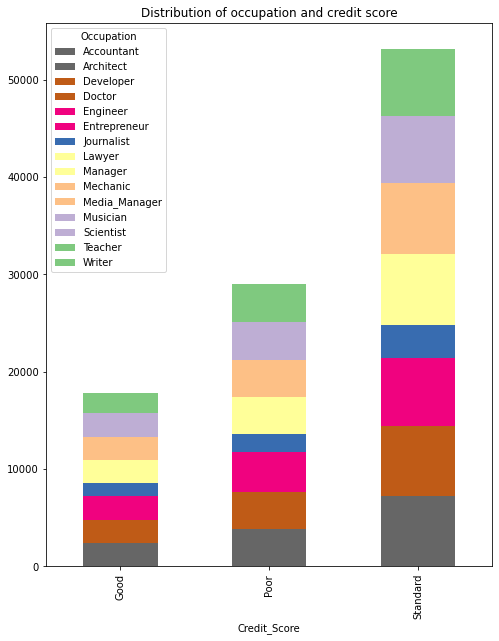

In [57]:
# Distribution of occupation and credit score

a = dt.groupby(['Credit_Score','Occupation']).count()['Customer_ID'].unstack()
a.plot(kind = 'bar',colormap='Accent_r',stacked=True,figsize=(8,10))
plt.title("Distribution of occupation and credit score")